In [1]:
# 넘파이로 간단하게 구햔한 과정이 실제 케라스의 SimpleRNN에 해당한다.
from keras.layers import SimpleRNN

> SimpleRNN이 한가지 다른점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리한다는 점이다. 즉 (timesteps, input_features) 크기가 아니라 (batch_size, timesteps, input_features)크기의 입력을 받는다.
> #### 케라스에 있는 모든 순환 층과 마찬가지로 SimpleRNN은 두가지 모드로 실행할 수 있다. 각 타임스탭의 출력을 모은 전체 시퀀스를 반환하거나, 입력시퀀스에 대한 마지막 출력만 반환할 수 있다.

### 마지막 타임스텝의 출력만 얻는 예제

In [2]:
from keras.models import Sequential
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


#### 전체 시퀀스를 반환하려면 SimpleRNN의 인자에 return_sequence값을 true로 해주면 된다.

## IMDB 영화 리뷰 분류 문제에 적용해 보기

### IMDB데이터 전처리

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이(가장 빈번한 10000개의 단어만 사용)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples X time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_data의 크기:', input_train.shape)
print('input_test의 크기:', input_test.shape)

데이터 로딩...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples X time)
input_data의 크기: (25000, 500)
input_test의 크기: (25000, 500)


### Embedding 층과 SimpleRNN층을 사용하여 간단한 순환 네트워크 훈련시키기

In [4]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 106ms/step - loss: 0.6771 - acc: 0.5542 - val_loss: 0.4435 - val_acc: 0.8040
Epoch 2/10
157/157 [==============================] - 17s 108ms/step - loss: 0.4211 - acc: 0.8190 - val_loss: 0.3785 - val_acc: 0.8454
Epoch 3/10
157/157 [==============================] - 17s 110ms/step - loss: 0.3020 - acc: 0.8817 - val_loss: 0.3490 - val_acc: 0.8574
Epoch 4/10
157/157 [==============================] - 16s 104ms/step - loss: 0.2555 - acc: 0.8993 - val_loss: 0.4118 - val_acc: 0.8224
Epoch 5/10
157/157 [==============================] - 17s 105ms/step - loss: 0.2270 - acc: 0.9051 - val_loss: 0.3834 - val_acc: 0.8510
Epoch 6/10
157/157 [==============================] - 16s 104ms/step - loss: 0.1584 - acc: 0.9417 - val_loss: 0.4084 - val_acc: 0.8506
Epoch 7/10
157/157 [==============================] - 16s 104ms/step - loss: 0.1465 - acc: 0.9441 - val_loss: 0.4787 - val_acc: 0.8288
Epoch 8/10
157/157 [==============================] - 1

### 결과 그래프 그리기

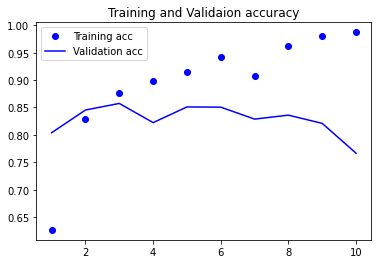

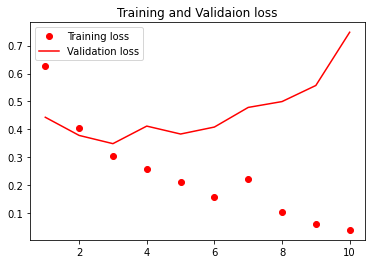

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validaion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validaion loss')
plt.legend()

plt.show()

> 이 모델이 성능이 높지 않은 이유는 500개의 단어만 사용했기 때문이여..

## 케라스를 활용한 LSTM예제
> 솔직히 어려운 것이 너무 많아 설명하기 어렵다. LSTM은 셀의 역할만 기억하면 된다. 과거 정보를 나중에 다시 주입하여 그래디언트 소실 문제를 해결하는 것이다.

### 케라스에서 LSTM층 사용하기

In [7]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 38s 227ms/step - loss: 0.5981 - acc: 0.6735 - val_loss: 0.3497 - val_acc: 0.8576
Epoch 2/10
157/157 [==============================] - 37s 239ms/step - loss: 0.2948 - acc: 0.8872 - val_loss: 0.2901 - val_acc: 0.8828
Epoch 3/10
157/157 [==============================] - 38s 242ms/step - loss: 0.2255 - acc: 0.9120 - val_loss: 0.2958 - val_acc: 0.8906
Epoch 4/10
157/157 [==============================] - 38s 240ms/step - loss: 0.1941 - acc: 0.9293 - val_loss: 0.3695 - val_acc: 0.8474
Epoch 5/10
157/157 [==============================] - 38s 243ms/step - loss: 0.1693 - acc: 0.9401 - val_loss: 0.3976 - val_acc: 0.8736
Epoch 6/10
157/157 [==============================] - 40s 253ms/step - loss: 0.1577 - acc: 0.9471 - val_loss: 0.4519 - val_acc: 0.8654
Epoch 7/10
157/157 [==============================] - 40s 253ms/step - loss: 0.1420 - acc: 0.9514 - val_loss: 0.3403 - val_acc: 0.8858
Epoch 8/10
157/157 [==============================] - 3

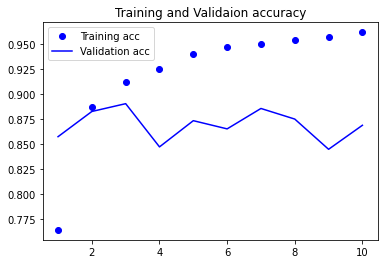

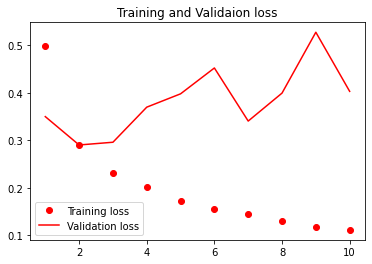

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validaion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validaion loss')
plt.legend()

plt.show()

### 역시 그래디언트 소실 문제로부터 영향을 덜 받기 때문에 정확도가 더 올랐다는 사실이다!!! 근데 획기적인 결과는 아니라네. 임베딩 차원이나 LSTM출력 차원 같은 하이퍼 파라미터를 튜닝하지 않아서이고, 규제가 없기 때문이다. 하지만 훨씬 더 복잡한 자연어 처리 부분에서는 진가가 들어난다!! 예를 들어 질문-응답이라던지, 기계 번역이라던지 말이다.